<a href="https://colab.research.google.com/github/AlamProgram/Machine_Learning_Project/blob/main/FinalProjectSmokerDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Library & Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mengatur opsi untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/playground-series-s3e24/train.csv')

In [ ]:
df.head()

Cek Mising Value

In [ ]:
df.info()

Info:
1. no missing value


Drop ID

In [ ]:
df  = df.drop(columns=['id'])

In [ ]:
df.info()

Drop Duplicate

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

Cek Proporsi 1 dan 0

In [ ]:
df_smoker_precentage = df['smoking'].value_counts()
df_smoker_precentage

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(df_smoker_precentage, labels=['Non-Smoker', 'Smoker'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Non-Smoker dan Smoker')
plt.show()

Info:
1. no need balancing

#Train Temp Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Pisahkan data menjadi data train dan data temp (gabungan validasi dan test)
df_train, df_temp = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

# Sekarang Anda memiliki:
# df_train: DataFrame yang hanya berisi data training
# df_temp: DataFrame yang berisi gabungan data validasi dan test


# EDA & Feature Enginering

## Age

In [ ]:
df_train.info()

In [ ]:
# Menghitung jumlah perokok untuk setiap kelompok usia
smokers_per_age = df_train.groupby('age')['smoking'].sum()
smokers_per_age

In [ ]:
# Menghitung total jumlah orang untuk setiap kelompok usia
total_per_age = df['age'].value_counts()
total_per_age

In [ ]:
# Menghitung persentase perokok untuk setiap kelompok usia
percentage_smokers_by_age = (smokers_per_age / total_per_age)
percentage_smokers_by_age

In [ ]:
# grouping age agar tidak overvitting pada umur2 tertentu yang data perokoknya ekstrim (sama sekali tidak ada perokok)
# yang berisiko mengakibatkan model mengidentifikasi pada umur tertentu tidak mungkin ada perokok. padalah mungkin saja pada kasus lain di umur yang sama ada prokok

def age_group(age):
    if 20 <= age <40:
        return 1 # high prob
    elif 40 <= age <= 50:
        return 2 # medium prob
    elif 50 < age <= 60:
        return 3 # low prob
    elif age > 60:
        return 4

df_train['age_catg'] = df_train['age'].apply(age_group)
    # Baris kode ini bertugas untuk membuat kolom baru di dalam df_train,
    # yang dinamai 'age_catg'. Nilai-nilai di kolom baru ini berasal dari hasil penerapan
    # fungsi age_group ke setiap baris di kolom 'age' yang sudah ada.

In [ ]:
# Menghitung jumlah perokok untuk setiap kelompok age
smoker_per_age_catg = df_train.groupby('age_catg')['smoking'].sum()
smoker_per_age_catg

In [ ]:
# Menghitung jumlah populasi untuk setiap kelompok age
total_per_age_catg = df_train['age_catg'].value_counts()
total_per_age_catg

In [ ]:
percentage_smoker_per_age_catg = (smoker_per_age_catg / total_per_age_catg)
percentage_smoker_per_age_catg

In [ ]:
# Membuat dictionary mapping usia ke persentase perokok
percentage_map = percentage_smoker_per_age_catg.to_dict()

# Membuat kolom baru 'percentage_smokers' berdasarkan nilai di kolom 'age'
df_train['%smoker_age'] = df_train['age_catg'].map(percentage_map)

df_train.head()

Info:
1. semakin tua, peluang orang untuk merokok semakin kecil.

In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [ ]:
# buat heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [ ]:
# terdapat multico antara waight dan waist
df_train = df_train.drop(columns=['waist(cm)'])

## BMI (weight, hight, age)

In [ ]:
# buat kolom BMI, konvert cm ke m
df_train['BMI'] = df_train['weight(kg)'] / (df_train['height(cm)'] / 100) ** 2

In [ ]:
df_train.head(3)

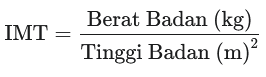

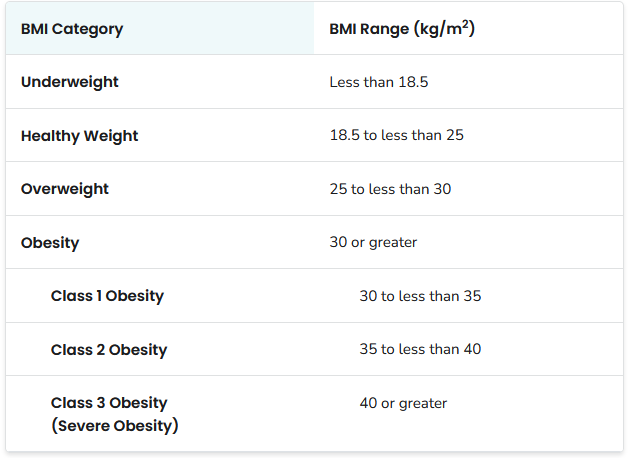

Sumber: https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [ ]:
def BMI_category(BMI):
    if BMI < 18.5:
        return 1 #Underweight
    elif BMI >= 18.5 and BMI < 25:
        return 2 # Healty Weight
    elif BMI >= 25 and BMI < 30:
        return 3 # Overweight
    elif BMI >= 30 and BMI  < 35:
        return 4 # Class 1 Obesity
    elif BMI >= 35 and BMI  <= 40:
        return 5 # Class 2 Obesity
    elif BMI >40:
        return 6 # Class 3 Obesity


df_train['BMI_catg'] = df_train['BMI'].apply(BMI_category)


In [ ]:
df_train.head(3)

In [ ]:
# Menghitung jumlah perokok untuk setiap kelompok usia
smokers_by_BMI_catg = df_train.groupby('BMI_catg')['smoking'].sum()

# Menghitung total jumlah orang untuk setiap kelompok usia
total_by_BMI_catg = df_train['BMI_catg'].value_counts()

# Menghitung persentase perokok untuk setiap kelompok usia
percentage_smokers_each_BMI_catg = (smokers_by_BMI_catg / total_by_BMI_catg)
percentage_smokers_each_BMI_catg

In [ ]:
# Membuat dictionary mapping usia ke persentase perokok
percentage_map_1 = percentage_smokers_each_BMI_catg.to_dict()

# Membuat kolom baru 'percentage_smokers' berdasarkan nilai di kolom 'age'
df_train['%smoker_BMI_catg'] = df_train['BMI_catg'].map(percentage_map_1)

df_train.head()

**.to_dict(**):
mengonversi isi dari Series menjadi sebuah dictionary.

In [ ]:
print('Percenage smober by BMI Category')
print(percentage_smokers_each_BMI_catg)

Info:
1. semakin gemuk, peluang orang untuk merokok relatif meningkat. ada indikasi merokok juga  diikuti oleh pola makan yang berlebihan

In [ ]:
df_train.info()

In [ ]:
df_train.head(3)

## Eyesight (left)
Merokok dapat meningkatkan risiko berbagai penyakit mata yang serius dan bahkan menyebabkan kebutaan.

In [ ]:
smoker_per_eyesight_L = df_train.groupby('eyesight(left)')['smoking'].sum()
smoker_per_eyesight_L

In [ ]:
total_per_eyesight_L = df_train['eyesight(left)'].value_counts()
total_per_eyesight_L

In [ ]:
ES_L = smoker_per_eyesight_L / total_per_eyesight_L
ES_L
#

In [ ]:
'''
< 35 rendah		    0.1 <= eyesight <= 0.6
35  - 50 sedang		0.6 < eyesight <= 1.3
> 50 tinggi		    1.3 < eyesight <= 2.0
else
'''

def ES_catg(eyesight):
    if 0.1 <= eyesight <= 0.6:
        return 1 #low prob
    elif 0.6 < eyesight <= 1.3:
        return 2 #medium prob
    elif 1.3 < eyesight <= 2.0:
        return 3 # hight prob
    else:
        return 1

df_train['ESL_catg'] = df_train['eyesight(left)'].apply(ES_catg)

In [ ]:
smoker_per_ESL_catg = df_train.groupby('ESL_catg')['smoking'].sum()
smoker_per_ESL_catg

In [ ]:
total_per_ESL_catg = df_train['ESL_catg'].value_counts()
total_per_ESL_catg

In [ ]:
percentage_by_ESL_catg = smoker_per_ESL_catg / total_per_ESL_catg
percentage_by_ESL_catg

In [ ]:
percentage_map_ESL = percentage_by_ESL_catg.to_dict()

In [ ]:
df_train['%ESL'] = df_train['ESL_catg'].map(percentage_map_ESL)

In [ ]:
df_train.head(3)

##Eyesight (Right)

In [ ]:
smoker_per_eyesight_R = df_train.groupby('eyesight(right)')['smoking'].sum()
smoker_per_eyesight_R

In [ ]:
total_per_eyesight_R = df_train['eyesight(right)'].value_counts()
total_per_eyesight_R

In [ ]:
SE_R = smoker_per_eyesight_R / total_per_eyesight_R
SE_R

In [ ]:
def ESR_catg(eyesight):
    if 0.1 <= eyesight <= 0.7:
        return 1 #low prob
    elif 0.7 < eyesight <= 1.3:
        return 2 #medium prob
    elif 1.3 < eyesight <= 2.0:
        return 3 # hight prob
    else:
        return 1

df_train['ESR_catg'] = df_train['eyesight(right)'].apply(ESR_catg)

In [ ]:
smoker_per_ESR_catg =  df_train.groupby('ESR_catg')['smoking'].sum()
smoker_per_ESR_catg

In [ ]:
total_per_EST_catg = df_train['ESR_catg'].value_counts()
total_per_EST_catg

In [ ]:
percentage_by_ESR_catg = smoker_per_ESR_catg / total_per_EST_catg
percentage_by_ESR_catg

In [ ]:
percentage_map_ESR = percentage_by_ESR_catg.to_dict()


In [ ]:
df_train['%ESR'] = df_train['ESR_catg'].map(percentage_map_ESR)

In [ ]:
df_train.info()

In [ ]:
# Membuat countplot menggunakan seaborn
plt.figure(figsize=(20, 6))  # Mengatur ukuran gambar agar lebih mudah dibaca
sns.countplot(data=df_train, x='eyesight(left)', hue='smoking')

# Menambahkan label dan judul
plt.title('Distribusi Eyesight(left) Berdasarkan Status Merokok (Rentang 0 - 0.9)')
plt.xlabel('Eyesight(left)')
plt.ylabel('Jumlah Data')
plt.legend(title='Smoking', labels=['Tidak Merokok (0)', 'Merokok (1)'])

# Menambahkan anotasi nilai di atas setiap bar (opsional, tapi membantu interpretasi)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 10,
            '{:.0f}'.format(height),
            ha='center', va='bottom', fontsize=8)

# Menampilkan plot
plt.tight_layout()
plt.show()

## Blood Pressure (Systolic, Diastolic/Relaxation)
Sistolik adalah tekanan darah saat jantung berkontraksi (memompa darah keluar). Ini adalah angka atas dalam pembacaan tekanan darah.

Ketika dokter atau alat pengukur tekanan darah mencatat dua angka, misalnya 120/80 mmHg:

    1. 120 adalah tekanan sistolik. Ini menunjukkan tekanan di arteri Anda saat otot jantung Anda memeras (berkontraksi) untuk memompa darah ke seluruh tubuh. Tekanan ini paling tinggi selama siklus jantung.

    2. 80 adalah tekanan diastolik. Ini menunjukkan tekanan di arteri Anda saat otot jantung Anda berelaksasi di antara detak jantung, memungkinkan jantung terisi darah kembali. Tekanan ini paling rendah selama siklus jantung.

    3. mmHg adalah singkatan dari milimeter merkuri, unit yang digunakan untuk mengukur tekanan darah.

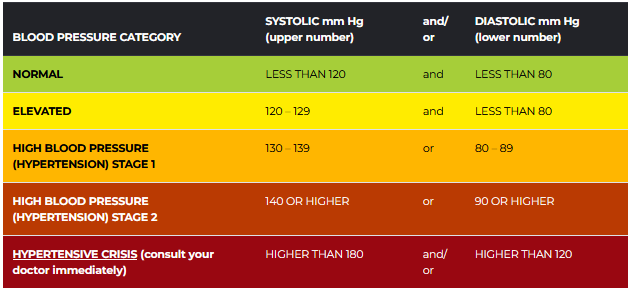

Sumber: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

sumber:

In [ ]:
def map_blood_pressure(systolic, relaxation):
    if (systolic < 120) and (relaxation < 80):
        return 1  # Normal
    elif (systolic >= 120 and systolic <= 129) and (relaxation < 80):
        return 2  # Elevated
    elif (systolic >= 130 and systolic <= 139) or (relaxation >= 80 and relaxation <= 89):
        return 3  # High Stage 1
    elif (systolic >= 180) or (relaxation >= 120):
        return 5  # Hypertensive Crisis
    elif (systolic >= 140) or (relaxation >= 90):
        return 4  # High Stage 2
    else:
        return None  # Atau nilai lain untuk kasus di luar kondisi di atas

# Menerapkan fungsi ke setiap baris DataFrame
df_train['BloodPressure'] = df_train.apply(lambda row: map_blood_pressure(row['systolic'], row['relaxation']), axis=1)


In [ ]:
df_train.info()

In [ ]:

# Menghitung jumlah perokok untuk setiap kelompok Bloos pressure
smoker_by_BloodPressure = df_train.groupby('BloodPressure')['smoking'].sum()

# Menghitung total jumlah orang untuk setiap kelompok BloodPressure
total_by_BloodPressure = df_train['BloodPressure'].value_counts()

# Menghitung persentase perokok untuk setiap kelompok blood Pressure
percentage_smoker_byBloodPressure = (smoker_by_BloodPressure / total_by_BloodPressure)

percentage_smoker_byBloodPressure

Info:
1. peluang seseorang merokok relatif lebih banyak dengan kategori Tekanan darah 3 hingga 4

In [ ]:
# Membuat dictionary mapping usia ke persentase perokok
percentage_map_2 = percentage_smoker_byBloodPressure.to_dict()

In [ ]:
# Membuat kolom baru 'percentage_smokers' berdasarkan nilai di kolom 'BloodPressure'
df_train['%smoker_BloodPressure'] = df_train['BloodPressure'].map(percentage_map_2)

df_train.head()

## Fasting Blood Sugar

**Standar Gula Darah Puasa**

*   Normal: 70 - 100
*   PraDiabet: 101 - 125
* Diabet: > 126

Sumber: https://www-who-int.translate.goog/data/gho/indicator-metadata-registry/imr-details/2380?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc

In [ ]:
B_sugar = df_train['fasting blood sugar'].value_counts().sort_values(ascending = False)
B_sugar

In [ ]:
#grouping gula darah berdasarkan standar yg jelas
def BS_catg(fasting_blood_sugar):
    if fasting_blood_sugar <= 100 :
        return 1 # normal
    elif 100 < fasting_blood_sugar <= 125:
        return 2 # pradiabet
    elif fasting_blood_sugar  >= 126:
        return 3 # diabetes

df_train['BS_catg'] = df_train['fasting blood sugar'].map(BS_catg)

df_train.head(3)


In [ ]:
df_train.info()

In [ ]:
smoker_per_BS_catg = df_train.groupby('BS_catg')['smoking'].sum()
smoker_per_BS_catg

In [ ]:
# Menghitung total jumlah orang untuk setiap kelompok BloodPressure
total_by_BS_catg = df_train['BS_catg'].value_counts()
total_by_BS_catg

In [ ]:
# Menghitung persentase perokok untuk setiap kelompok blood Pressure
percentage_smoker_by_BS_catg = (smoker_per_BS_catg / total_by_BS_catg)

percentage_smoker_by_BS_catg

Info:
1. Orang yang merokok berpeluang lebih besar berada pada kelompok orang dengan kadar gula darah yang lebih tinggi.

In [ ]:
# Membuat dictionary mapping Blood Sugar Category ke persentase perokok dalam kelompok tersebut
percentage_map_3 = percentage_smoker_by_BS_catg.to_dict()

In [ ]:
# Membuat kolom baru 'percentage_smokers' berdasarkan nilai di kolom 'BloodPressure'
df_train['%smoker_BS_catg'] = df_train['BS_catg'].map(percentage_map_3)

df_train.head()

## Cholesterol (Cholesterol total, HDL, LDL, Trigliserida)


Meroko dapat mengakibatkan:
1. HDL (High dencity Lipoprotein / kolesterol baik) menurun.
2. LDL (Low Dencity Lipoprotein / kolesterol jahat) meningkat.
3. Trigliserida (kolesterol lainnya) meningkat.

### Cholesterol

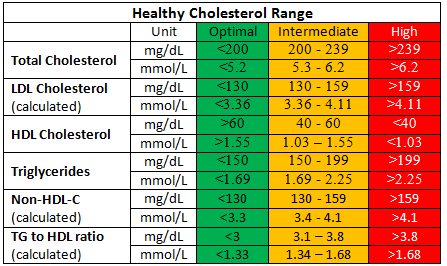

Sumber: https://healthy-ojas.com/cholesterol/healthy-cholesterol-level.html

In [ ]:
kolesterol = df_train['Cholesterol'].value_counts().sort_values(ascending=False)
kolesterol


In [ ]:
def chol(Cholesterol):
    if Cholesterol < 200:
        return 1 # Optimal
    elif 200 <= Cholesterol <= 239:
        return 2 # Intermediate
    elif Cholesterol > 239:
        return 3 # High

df_train['chol_catg'] = df_train['Cholesterol'].apply(chol)
df_train.head()


In [ ]:
df_train.info()

In [ ]:
# Jumlah perokok per kategori kolesterol
smoker_per_chol_catg = df_train.groupby('chol_catg')['smoking'].sum()
smoker_per_chol_catg

In [ ]:
total_per_chol_catg = df_train['chol_catg'].value_counts()
total_per_chol_catg

In [ ]:
# Menghitung % perokok untuk setiap kategori Cholesterol
percentage_smoker_by_chol_catg = (smoker_per_chol_catg / total_per_chol_catg)

percentage_smoker_by_chol_catg

In [ ]:
# Membuat dictionary mapping Cholesterol Category ke persentase perokok dalam kelompok tersebut
percentage_map_4 = percentage_smoker_by_chol_catg.to_dict()

In [ ]:
df_train['%smoker_chol_catg'] = df_train['chol_catg'].map(percentage_map_4)
df_train.head(3)

### HDL (Kolesterol baik)

In [ ]:
def HDL(HDL):
    if HDL < 40:
        return 1 # Rendah
    elif 40 <= HDL <= 59:
        return 2 # Intermediate
    elif HDL > 59:
        return 3 # Optimal

df_train['HDL_catg'] = df_train['HDL'].apply(HDL)
df_train.head()

In [ ]:
# hitung julah perokok untuk setiap kategori HDL
smoker_per_HDL_catg = df_train.groupby('HDL_catg')['smoking'].sum()
smoker_per_HDL_catg

In [ ]:
#menghitung total orang untuk setiap kategori HDL
total_per_HDL_catg = df_train['HDL_catg'].value_counts()
total_per_HDL_catg

In [ ]:
# % setiap perokok disetiap kelompok HDL
percentage_smoker_by_HDL_catg = (smoker_per_HDL_catg / total_per_HDL_catg)

percentage_smoker_by_HDL_catg

Info:
1. perokok cenderung berada lebih banyak pada kelompok orang ber-HDL rendah (berisiko serangan jantung)

In [ ]:
# Buat dictionary % HDL Category
percentage_map_5 = percentage_smoker_by_HDL_catg.to_dict()

df_train['%smoker_HDL_catg'] = df_train['HDL_catg'].map(percentage_map_5)
df_train.head(3)

In [ ]:
df_train.info()

### LDL (Kolesterol Jahat)

In [ ]:
min_LDL = df_train['LDL'].min()
min_LDL

In [ ]:
max_LDL = df_train['LDL'].max()
max_LDL

In [ ]:
LDL_value_array = df_train['LDL'].unique()
LDL_value_series = pd.Series(LDL_value_array)
LDL_value_sorted_desc = LDL_value_series.sort_values(ascending=False)

print("Nilai Unik LDL (Descending - Pandas Series):")
print(LDL_value_sorted_desc)

In [ ]:
def LDL(LDL):
    if LDL < 100:
        return 1 # Optimal
    elif 100 <= LDL <= 129:
        return 2 # Intermediate
    elif 130 <= LDL <= 159:
        return 3 # Intermediate
    elif 160 <= LDL <= 189:
        return 4 # Intermediate
    elif LDL >= 190:
        return 5 # High

df_train['LDL_catg'] = df_train['LDL'].apply(LDL)
df_train

In [ ]:
smoker_per_LDL_catg = df_train.groupby('LDL_catg')['smoking'].sum()
smoker_per_LDL_catg

In [ ]:
total_per_LDL_catg = df_train['LDL_catg'].value_counts()
total_per_LDL_catg

In [ ]:
percentage_smoker_by_LDL_catg = (smoker_per_LDL_catg / total_per_LDL_catg)

percentage_smoker_by_LDL_catg

In [ ]:
percentage_map_6 = percentage_smoker_by_LDL_catg.to_dict()

df_train['%smoker_LDL_catg'] = df_train['LDL_catg'].map(percentage_map_6)
df_train.head(3)


### Triglyceride

In [ ]:
def tri(triglyceride):
    if triglyceride < 150:
        return 1 # Optimal
    elif 150 <= triglyceride <= 199:
        return 2 # Intermediate
    elif 199 < triglyceride:
        return 3 # High

df_train['tri_catg'] = df_train['triglyceride'].apply(tri)
df_train.head(3)

In [ ]:
# perokok per kelompok kategori triglicarida
smoker_per_tri_catg = df_train.groupby('tri_catg')['smoking'].sum()
smoker_per_tri_catg

In [ ]:
#total per kategori tri
total_per_tri_catg = df_train['tri_catg'].value_counts()
total_per_tri_catg

In [ ]:
# % perokok per kelompok tri
percentage_smoker_by_tri_catg = (smoker_per_tri_catg / total_per_tri_catg)
percentage_smoker_by_tri_catg

Info:
1. perokok lebih banyak berada pada kelompok dengan kandungan trigliserida yang lebih tinggi

In [ ]:
percentage_map_7 = percentage_smoker_by_tri_catg.to_dict()

df_train['%smoker_tri_catg'] = df_train['tri_catg'].map(percentage_map_7)
df_train.head(3)

In [ ]:
df_train.info()

### Hemoglobin

Merokok memiliki pengaruh yang kompleks terhadap kadar hemoglobin, dan cenderung menyebabkan peningkatan kadar hemoglobin dalam darah. Berikut penjelasannya:

1. **Peningkatan CO** (Karbon Monoksida): Asap rokok mengandung karbon monoksida (CO). CO memiliki afinitas yang jauh lebih tinggi terhadap hemoglobin dibandingkan oksigen. Ketika seseorang merokok, CO akan berikatan dengan hemoglobin, membentuk karboksihemoglobin (COHb).

2. **Penurunan Oksigen dalam Darah** (Hipoksia): Pembentukan COHb mengurangi jumlah hemoglobin yang tersedia untuk mengangkut oksigen ke seluruh tubuh, menyebabkan kondisi hipoksia (kekurangan oksigen) pada tingkat jaringan.

3. Respons Kompensasi Tubuh: Sebagai respons terhadap hipoksia kronis akibat merokok, **tubuh akan memproduksi lebih banyak sel darah merah** dan hemoglobin untuk meningkatkan kapasitas pengangkutan oksigen. Kondisi ini dikenal sebagai polisitemia sekunder

In [ ]:
# lihat nilai min dan max data hemoglobin
min_hemo = df_train['hemoglobin'].min()
min_hemo

In [ ]:
max_hemo = df_train['hemoglobin'].max()
max_hemo

Karena tidak adaketerangan jenis kelamin, maka kita asumsikan semua data adalah laki2.

Standar kadar hemoglobin untuk laki2 dewasa adalah 14 - 18 g/dl

Sumber: https://www.ncbi.nlm.nih.gov/books/NBK259/

In [ ]:
def hemo(hemoglobin):
    if hemoglobin < 14:
        return 1 # Rendah
    elif 14 <= hemoglobin <= 18:
        return 2 #normal
    elif hemoglobin > 18:
        return 3 #tinggi

df_train['hemo_catg'] = df_train['hemoglobin'].apply(hemo)
df_train.head()
#

In [ ]:
smoker_per_hemo_catg = df_train.groupby('hemo_catg')['smoking'].sum()
smoker_per_hemo_catg

In [ ]:
total_per_hemo_catg = df_train['hemo_catg'].value_counts()
total_per_hemo_catg

In [ ]:
percentage_map_8 = (smoker_per_hemo_catg/total_per_hemo_catg)

In [ ]:
percentage_map_8

Info:
1. aktivitas merokok berkaitan dengan peningkatan kadar hemoglobin dalam darah.

In [ ]:
percentage_map_8 = percentage_map_8.to_dict()

In [ ]:
df_train['%smoker_hemo_catg'] = df_train['hemo_catg'].map(percentage_map_8)

In [ ]:
df_train.head()

## Urin Protein
Merokok secara signifikan meningkatkan risiko proteinuria dan kerusakan ginjal melalui berbagai mekanisme, termasuk kerusakan pembuluh darah, peningkatan tekanan darah, peradangan, dan kerusakan langsung pada glomeruli.

In [ ]:
min_UP = df_train['Urine protein'].min()
min_UP

In [ ]:
max_UP = df_train['Urine protein'].max()
max_UP

In [ ]:
smoker_per_UP = df_train.groupby('Urine protein')['smoking'].sum()
smoker_per_UP

In [ ]:
total_per_UP = df_train['Urine protein'].value_counts()
total_per_UP

In [ ]:
percentage_smoker_by_UP = (smoker_per_UP / total_per_UP)
percentage_smoker_by_UP

agar peningkatan peluang perokok sesuai dengan informasi medis bahwa merokok dapat meningkatkan kadar protein dalam urin, kita kelompokkan kadar 4, 5, dan 6 ke dalam 1 kelompok.

In [ ]:
def UP(Urine_protein):
    if 1 <= Urine_protein <= 4:
        return Urine_protein
    elif Urine_protein > 4:
        return 4

df_train['UP_1'] = df_train['Urine protein'].apply(UP)

In [ ]:
smoker_per_UP_1 = df_train.groupby('UP_1')['smoking'].sum()
smoker_per_UP_1

In [ ]:
total_per_UP_1 = df_train['UP_1'].value_counts()
total_per_UP_1

In [ ]:
percentage_smoker_by_UP_1 = (smoker_per_UP_1/total_per_UP_1)
percentage_smoker_by_UP_1

In [ ]:
percentage_map_9 = percentage_smoker_by_UP_1.to_dict()

In [ ]:
df_train['%smoker_UP_1'] = df_train['UP_1'].map(percentage_map_9)

In [ ]:
df_train.info()

## serum creatinine

Rendah: Di bawah 0.74 mg/dL
Normal: 0.74 - 1.35 mg/dL
Tinggi: Di atas 1.35 mg/dL

Sumber: https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646#:~:text=Serum%20creatinine%20level%20*%20For%20adult%20men%2C,to%201.04%20mg/dL%20(52.2%20to%2091.9%20mmol/L).

In [ ]:
smoker_per_SC = df_train.groupby('serum creatinine')['smoking'].sum()
smoker_per_SC

In [ ]:
def SC(serum_creatinine):
    if serum_creatinine < 0.75:
        return 1 # low
    elif 0.74 <= serum_creatinine <= 1.35:
        return 2 # normal
    elif serum_creatinine > 1.35:
        return 3 # high

df_train['SC_catg'] = df_train['serum creatinine'].apply(SC)

In [ ]:
# melihat jumlah perokok per SC category
smoker_per_SC_catg = df_train.groupby('SC_catg')['smoking'].sum()
smoker_per_SC_catg

In [ ]:
total_per_SC_catg = df_train['SC_catg'].value_counts()
total_per_SC_catg

In [ ]:
percentage_smoker_by_SC_catg = (smoker_per_SC_catg/total_per_SC_catg)
percentage_smoker_by_SC_catg

In [ ]:
percentage_map_10 = percentage_smoker_by_SC_catg.to_dict()

In [ ]:
df_train['%smoker_SC'] = df_train['SC_catg'].map(percentage_map_10)

In [ ]:
df_train.info()

In [ ]:
#df_train.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/df_train.csv')

In [ ]:
#df_train = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/df_train.csv')

In [ ]:
df_train.info()

## AST
AST (Aspartate Aminotransferase), juga dikenal sebagai SGOT (Serum Glutamic-Oxaloacetic Transaminase), adalah **enzim yang terutama ditemukan di hati, jantung, otot, ginjal, dan otak**. Dalam jumlah kecil, AST biasanya hadir dalam darah. Namun, ketika sel-sel di organ-organ ini rusak, AST dapat bocor ke dalam aliran darah, menyebabkan peningkatan kadar AST dalam serum.

Peningkatan Kadar AST: Beberapa studi observasional menunjukkan bahwa perokok cenderung memiliki kadar AST serum yang sedikit lebih tinggi dibandingkan dengan bukan perokok.

Standart: 10 - 40 UI/L

Sumber: https://prestigeer.com/blog/read-interpret-liver-function-test/



In [ ]:
# min dan max
min_AST = df_train['AST'].min()
min_AST

In [ ]:
max_AST = df_train['AST'].max()
max_AST

In [ ]:
smoker_per_AST = df_train.groupby('AST')['smoking'].sum()
smoker_per_AST

In [ ]:
def AST_func(AST):
    if AST < 10:
        return 1 # low
    elif 10 <= AST <= 40:
        return 2 # normal
    elif AST > 40:
        return 3 # high

df_train['AST_catg'] = df_train['AST'].apply(AST_func)

In [ ]:
smoker_per_AST_catg = df_train.groupby('AST_catg')['smoking'].sum()
smoker_per_AST_catg

In [ ]:
total_per_AST_catg  = df_train['AST_catg'].value_counts()
total_per_AST_catg

In [ ]:
percentage_smoker_by_AST_catg = (smoker_per_AST_catg/total_per_AST_catg)
percentage_smoker_by_AST_catg

In [ ]:
percentage_map_11 = percentage_smoker_by_AST_catg.to_dict()

In [ ]:
df_train['%smoker_AST_catg'] = df_train['AST_catg'].map(percentage_map_11)

In [ ]:
df_train.head()

## ALT

ALT adalah singkatan dari Alanine Aminotransferase. Ini adalah enzim lain yang terutama ditemukan di sel-sel hati, tetapi juga dalam jumlah kecil di ginjal dan otot. Seperti AST, ALT adalah enzim intraseluler, dan kadar ALT dalam darah biasanya rendah. Ketika terjadi kerusakan pada hati, sel-sel hati melepaskan ALT ke dalam aliran darah, menyebabkan kadar ALT dalam darah meningkat. Oleh karena itu, tes ALT sering digunakan sebagai indikator kerusakan hati.

Secara umum, merokok dapat dikaitkan dengan kadar ALT yang lebih tinggi, meskipun peningkatannya mungkin seringkali ringan dan tidak spesifik. Peningkatan kadar ALT pada perokok lebih mungkin terjadi jika mereka memiliki kondisi hati yang mendasari (seperti NAFLD) yang diperburuk oleh merokok, atau jika merokok telah menyebabkan efek sistemik yang mempengaruhi hati. (Gemini)

The normal range is 4 to 36 U/L.

Sumber: https://www.ucsfhealth.org/medical-tests/alanine-transaminase-%28alt%29-blood-test

In [ ]:
def ALT_func(ALT):
    if ALT < 4:
        return 1 # low
    elif 4 <= ALT <= 36:
        return 2 # normal
    elif ALT > 36:
        return 3 # high

df_train['ALT_catg'] = df_train['ALT'].apply(ALT_func)

In [ ]:
smoker_per_ALT_catg = df_train.groupby('ALT_catg')['smoking'].sum()
smoker_per_ALT_catg

In [ ]:
total_per_ALT_catg = df_train['ALT_catg'].value_counts()
total_per_ALT_catg

In [ ]:
percentage_smoker_by_ALT_catg = (smoker_per_ALT_catg/total_per_ALT_catg)
percentage_smoker_by_ALT_catg

In [ ]:
percentage_map_12 = percentage_smoker_by_ALT_catg.to_dict()

In [ ]:
df_train['%smoker_ALT_catg'] = df_train['ALT_catg'].map(percentage_map_12)

In [ ]:
df_train.info()

##Gtp

Gtp adalah singkatan dari Gamma-glutamyl transferase (γ-GTP) adalah enzim yang terdapat di banyak organ tubuh, tetapi konsentrasi tertingginya ada di hati. Enzim ini berperan dalam metabolisme obat dan detoksifikasi.

Beberapa penelitian menunjukkan bahwa perokok cenderung memiliki kadar γ-GTP yang lebih tinggi dibandingkan dengan bukan perokok.

Pria: 8 hingga 60 Unit per Liter (U/L)

Sumber: https://pmc.ncbi.nlm.nih.gov/articles/PMC11896896/

In [ ]:
def gtp(Gtp):
    if Gtp < 8:
        return 1 # low
    elif 8 <= Gtp <= 60:
        return 2 # normal
    elif Gtp > 60:
        return 3 # high

df_train['Gtp_catg'] = df_train['Gtp'].apply(gtp)

In [ ]:
smoker_per_Gtp_catg = df_train.groupby('Gtp_catg')['smoking'].sum()
smoker_per_Gtp_catg

In [ ]:
total_per_Gtp_catg = df_train['Gtp_catg'].value_counts()
total_per_Gtp_catg

In [ ]:
percentage_smoker_by_Gtp_catg = (smoker_per_Gtp_catg/total_per_Gtp_catg)
percentage_smoker_by_Gtp_catg

Info:
1. perokok cenderung memiliki ciri kadar Gtp yang tinggi

In [ ]:
percentage_map_13 = percentage_smoker_by_Gtp_catg.to_dict()

In [ ]:
df_train['%smoker_Gtp_catg'] = df_train['Gtp_catg'].map(percentage_map_13)

In [ ]:
df_train.head()

In [ ]:
df_train.info()

## dantal caries

In [ ]:
smoker_per_DC = df_train.groupby('dental caries')['smoking'].sum()
smoker_per_DC

In [ ]:
total_by_DC = df_train['dental caries'].value_counts()
total_by_DC

In [ ]:
percentage_smoker_per_DC = (smoker_per_DC/total_by_DC)
percentage_smoker_per_DC

Info:
1. orang perokok cenderung memiliki karies gigi

In [ ]:
perecentage_map_14 = percentage_smoker_per_DC.to_dict()

In [ ]:
df_train['%smoker_DC'] = df_train['dental caries'].map(perecentage_map_14)

In [ ]:
df_train.info()

In [ ]:
df_train.to_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/df_train.csv', index=False)

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/df_train.csv')

In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [ ]:
min_hearing_left = df_train['hearing(left)'].min()
min_hearing_left

In [ ]:
max_hearing_left = df_train['hearing(left)'].max()
max_hearing_left

In [ ]:
hearing_right = df_train['hearing(right)'].unique()
hearing_right

#FE & Scaling

##Drop temporal column

In [ ]:
hapus = ['age_catg', 'BMI_catg', 'ESL_catg', 'ESR_catg', 'BS_catg', 'chol_catg', 'HDL_catg',
         'LDL_catg', 'tri_catg', 'hemo_catg', 'SC_catg', 'AST_catg', 'ALT_catg', 'Gtp_catg'
         ]
df_train = df_train.drop(columns=hapus).copy()

In [ ]:
df.info()

#Scaling


* Scaling hanya perlu dilakukan di variabel independent (X), variabel target tidak perlu. apalagi yg variabel targetnya 0 atau 1.

     Jenis2 Scaling:
     1. StandardScaler() / (**Standarisasi**): megubah data mejadi rata-rata 0 dan standar deviasi 1. Ini cocok untuk algoritma yang mengasumsikan distribusi normal atau sensitif terhadap skala fitur (misalnya, Support Vector Machines, Logistic Regression, Neural Networks).

     2. MinMaxScaler() (**Normalisasi**): MinMaxScaler mengubah fitur dengan menskalakannya ke rentang tertentu, biasanya antara 0 dan 1. Ini berguna untuk algoritma yang tidak mengasumsikan distribusi tertentu, atau ketika Anda ingin menjaga nilai-nilai dalam rentang yang terbatas (misalnya, Neural Networks, K-Nearest Neighbors).



In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

In [ ]:
# --- 2. Pisahkan Fitur (X) dan Target (y) ---
# Fitur (X) adalah semua kolom kecuali 'smoking'
X_train = df_train.drop('smoking', axis=1)

In [ ]:
# Target (y) adalah kolom 'smoking'
y_train = df_train['smoking']

In [ ]:
# --- 3. Inisialisasi Normalisasi ---
scaler = MinMaxScaler()

In [ ]:
# --- 4. Latih Scaler pada Fitur Pelatihan (X_train) ---
# Proses .fit() akan menghitung min dan max dari setiap kolom fitur di X_train
scaler.fit(X_train)

In [ ]:
# --- 5. Simpan Scaler (PENTING untuk digunakan nanti di aplikasi web) ---
# menyimpan scaler ini agar bisa digunakan untuk menormalisasi
# input data baru dari formulir web
import joblib
scaler_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/MinMaxScaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Model disimpan di: {scaler_filename}")


In [ ]:
# --- 6. Transformasi Fitur Pelatihan (X_train) ---
# Proses .transform() akan menerapkan normalisasi menggunakan min dan max yang dihitung
# pada langkah .fit()
X_train_scaled_np = scaler.transform(X_train)

In [ ]:
# Mengubah hasil transformasi (NumPy array) kembali menjadi DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

X_train_scaled.head()

In [ ]:
# --- 7. (Opsional) Menggabungkan kembali X_train_scaled dengan y_train ---
# Jika Anda perlu DataFrame lengkap yang sudah di-scale fitur-fiturnya
df_train_normalized = pd.concat([X_train_scaled, y_train], axis=1)

df_train_normalized.head()

In [ ]:
df_train_normalized.info()

#2. Train Test (apply scaling di data Test)


In [ ]:
df = df_train_normalized

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

In [ ]:
X = df.drop('smoking', axis = 1)
y = df['smoking']

In [ ]:

# 1. split data into Train and Temp
#Temp is used as variabel to store Validation and Test
X_train, X_temp, y_train, y_temp = train_test_split(    #train 70 % dan temp 30 %
    X, y, test_size=0.3, random_state=42, stratify=y    #stratify = y, artinya mempertahankan proporsi nilai unik (1 dan 0) dalam pemisahan data menjadi data train, temp, dan test
)

X_val, X_test, y_val, y_test = train_test_split(        # val
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


# Modelling

## Logistic Regrassion

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter=2000)
model_logistic.fit(X_train, y_train)

Sebelumnya menulis kode ini:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)

tapi ternyata belum mencapai zona convergensi
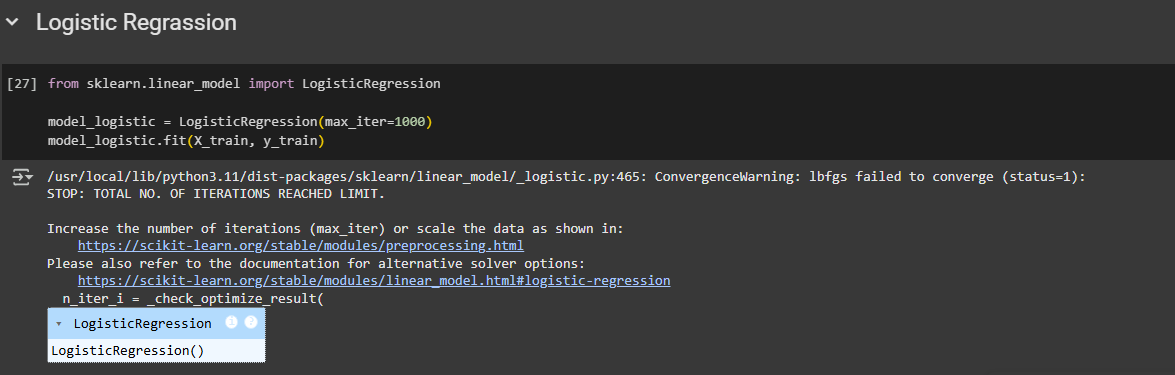

alternatifnya
* menerapkan scaling pada data
* meningkatkan iterasi
* mencoba alternatif sover selain lbfgs (mode default), seperti:
'liblinear' (bagus untuk dataset kecil dan jika Anda memiliki banyak fitur)
'saga' (bagus untuk dataset besar dan mendukung L1 regularization)
'newton-cg', 'sag'

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = model_logistic.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Test: {accuracy}")

In [ ]:
# 3. Dapatkan Probabilitas Prediksi untuk Data Uji
y_pred_proba = model_logistic.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1

# 4. Hitung FPR, TPR, dan Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 5. Hitung AUC
auc = roc_auc_score(y_test, y_pred_proba)

# 6. Plot Kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

####Confusin Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# --- Tambahkan ini: Hitung Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\n")

In [ ]:
# 5. Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# 6. Visualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar(heatmap.get_children()[0])  # Dapatkan mappable dari heatmap
plt.text(0.05, -0.2, f'Accuracy: {accuracy:.2%}', fontsize=10)
plt.text(0.05, -0.3, f'Precision: {precision:.2%}', fontsize=10)
plt.text(0.05, -0.4, f'Recall: {recall:.2%}', fontsize=10)
plt.text(0.05, -0.5, f'F1-Score: {f1:.2%}', fontsize=10)
plt.show()

In [ ]:
# Print classification report (precision, recall, f1-score)
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred))
print('---------------------------------------------------')
# Confusion matrix to understand true positives, false positives, etc.
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Non-Smoker', 'Actual Smoker'], columns=['Predicted Non-Smoker', 'Predicted Smoker'])
print("Confusion Matrix:\n", cm_df )
print('---------------------------------------------------')


## Random Forest

In [ ]:
!pip install optuna

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import optuna

### Hyperparameter Tuning

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Split data pelatihan untuk validasi awal
    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    rf_classifier.fit(X_train_opt, y_train_opt)
    y_pred_val = rf_classifier.predict(X_val_opt)
    accuracy = accuracy_score(y_val_opt, y_pred_val)  # Gunakan accuracy pada data validasi

    return accuracy # Optuna akan memaksimalkan nilai accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50) # Anda dapat mengubah n_trials sesuai kebutuhan

# Dapatkan parameter terbaik dari Optuna
best_params = study.best_params
print("Parameter terbaik:", best_params)

### Modelling Data

In [ ]:
# Inisialisasi model Random Forest dengan hyperparameter yang diberikan
rf_classifier = RandomForestClassifier(
    n_estimators=192,
    max_depth=20,
    min_samples_split=9,
    min_samples_leaf=5,
    random_state=42  # Untuk hasil yang dapat direproduksi
)

# Latih model
rf_classifier.fit(X_train, y_train)

#### ROF AUC

In [ ]:
# 3. Dapatkan Probabilitas Prediksi untuk Data Uji
y_pred_proba =rf_classifier.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1

# 4. Hitung FPR, TPR, dan Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 5. Hitung AUC
auc = roc_auc_score(y_test, y_pred_proba)

# 6. Plot Kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Confusin Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Test: {accuracy}")

In [ ]:
# Print classification report (precision, recall, f1-score)
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred))
print('---------------------------------------------------')
# Confusion matrix to understand true positives, false positives, etc.
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Non-Smoker', 'Actual Smoker'], columns=['Predicted Non-Smoker', 'Predicted Smoker'])
print("Confusion Matrix:\n", cm_df )
print('---------------------------------------------------')

In [ ]:
# 5. Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6. Visualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.text(0.05, -0.2, f'Accuracy: {accuracy:.2%}', fontsize=10)
plt.text(0.05, -0.3, f'Precision: {precision:.2%}', fontsize=10)
plt.text(0.05, -0.4, f'Recall: {recall:.2%}', fontsize=10)
plt.text(0.05, -0.5, f'F1-Score: {f1:.2%}', fontsize=10)
plt.show()

### Evaluation Matrix

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
recall = recall_score(y_test, y_pred)
print(f"Recall Test: {recall}")

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
roc_auc = roc_auc_score(y_test, y_pred)
print(f"roc_auc Test: {roc_auc}")

### Save Model

In [ ]:
import joblib

In [ ]:
model_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/Smoker_RF.joblib'
joblib.dump(rf_classifier, model_filename)
print(f"Model disimpan di: {model_filename}")

### Feature Importance

In [ ]:
# Feature Importance
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## AdaBOOST

In [ ]:
# import adaboostclassifier

from sklearn.ensemble import AdaBoostClassifier

### Hyperparameter Tuning

####Plotting Error_Rate Vs N Estimator

In [ ]:
error_rates = []

for i in range(1,50):

    model = AdaBoostClassifier(n_estimators = i)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

In [ ]:
#Plotting Error_Rate Vs Number of Estimators
plt.figure(figsize = (12,8))
plt.plot(range(1,50),error_rates, 'g', lw = 3, marker ="^", markersize = 10, markerfacecolor = "m")
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()

####Plotting Error_Rate Vs Learning Rate

In [ ]:
error_rates = []

for i in [0.0001,0.0001,0.001,0.01,0.1,1,1.1,1.2,1.3,1.4,1.5]:

    model = AdaBoostClassifier(learning_rate= i)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

In [ ]:
#Plotting Error and Learning Rate
plt.figure(figsize = (12,8))
plt.plot([0.0001,0.0001,0.001,0.01,0.1,1,1.1,1.2,1.3,1.4,1.5],error_rates, 'g', lw = 3, marker ="^", markersize = 10, markerfacecolor = "m")
plt.xlabel('Learning Rate',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()

####Estimating Number of Max Depth



In [ ]:
from sklearn.tree import DecisionTreeClassifier

error_rates = []

for i in (1,5,10, 15, 20, 25, 30, 35, 40, 45, 50):
    dt = DecisionTreeClassifier(random_state=42,max_depth = i)
    model = AdaBoostClassifier(estimator=dt)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    accuracy = np.mean(ypred == y_test)
    error = 1 - accuracy
    error_rates.append(error)

In [ ]:
#Plotting Error vs Max Depth

plt.figure(figsize=(12, 8))
plt.plot((1,5,10, 15, 20, 25, 30, 35, 40, 45, 50), error_rates, 'g', lw=3, marker="^", markersize=10, markerfacecolor="m")
plt.xlabel('Max Depth', fontsize=20)
plt.ylabel('Errors', fontsize=20)
plt.show()

#### Use The Lest error hyper parameter to be the range of hyperparameter tunning

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint'''
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import optuna

In [ ]:
def objective(trial):

    n_estimators = trial.suggest_categorical('n_estimators',[48, 49, 50] ) # Rentang integer dari 43 hingga 49
    learning_rate = trial.suggest_categorical('learning_rate', [1.3, 1.4, 1.5])
    estimator_max_depth = trial.suggest_categorical('estimator_max_depth', [20, 35]) # Rentang integer dari 5 hingga 30
    base_estimator = DecisionTreeClassifier(max_depth=estimator_max_depth, random_state=42)


    adaboost_classifier = AdaBoostClassifier(
        estimator=base_estimator, # Teruskan instance base_estimator yang sudah dibuat
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )


    score = cross_val_score(adaboost_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    return score.mean() # Mengembalikan rata-rata akurasi dari cross-validation


# Membuat dan Menjalankan Studi Optuna
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42)) # Menambahkan seed untuk reproduktifitas
print("Memulai optimasi hyperparameter dengan Optuna...")
study.optimize(objective, n_trials=18, show_progress_bar=True)

# Dapatkan parameter terbaik dari Optuna
best_params = study.best_params
print("\nParameter terbaik yang ditemukan oleh Optuna:")
print(best_params)

# Dapatkan skor terbaik
print("Skor akurasi terbaik (rata-rata cross-validation):")
print(study.best_value)

# Bangun ulang model terbaik dengan parameter yang ditemukan Optuna
best_base_estimator = DecisionTreeClassifier(
    max_depth=best_params['estimator_max_depth'],
    random_state=42
)
best_adaboost_model = AdaBoostClassifier(
    estimator=best_base_estimator,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

# Latih model terbaik pada seluruh data pelatihan (X_train, y_train)
best_adaboost_model.fit(X_train, y_train)
print("\nModel AdaBoost terbaik telah dilatih menggunakan parameter Optuna.")

###Modelling Data

In [ ]:
model_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/Smoker_AdaBoost.joblib' #ganti model_fraud dengan nama model yang diinginkan
joblib.dump(best_adaboost_model, model_filename)
print(f"Model disimpan di: {model_filename}")

#### ROC- AUC

In [ ]:
# 3. Dapatkan Probabilitas Prediksi untuk Data Uji
y_pred_proba =best_adaboost_model.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1

# 4. Hitung FPR, TPR, dan Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 5. Hitung AUC
auc = roc_auc_score(y_test, y_pred_proba)

# 6. Plot Kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = best_adaboost_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Test: {accuracy}")

In [ ]:
# Print classification report (precision, recall, f1-score)
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred))
print('---------------------------------------------------')
# Confusion matrix to understand true positives, false positives, etc.
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Non-Smoker', 'Actual Smoker'], columns=['Predicted Non-Smoker', 'Predicted Smoker'])
print("Confusion Matrix:\n", cm_df )
print('---------------------------------------------------')

In [ ]:
# 5. Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6. Visualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.text(0.05, -0.2, f'Accuracy: {accuracy:.2%}', fontsize=10)
plt.text(0.05, -0.3, f'Precision: {precision:.2%}', fontsize=10)
plt.text(0.05, -0.4, f'Recall: {recall:.2%}', fontsize=10)
plt.text(0.05, -0.5, f'F1-Score: {f1:.2%}', fontsize=10)
plt.show()

In [ ]:
# Predict on the validation set
y_pred =best_adaboost_model.predict(X_test)

# Predict probabilities for ROC-AUC evaluation
y_pred_prob = best_adaboost_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Validation: {accuracy}")

### Evaluation Matrix

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = best_adaboost_model.predict(X_test)

# Evaluasi model
recall = recall_score(y_test, y_pred)
print(f"Recall Test: {recall}")

In [ ]:
# Lakukan prediksi pada data pengujian
y_pred = best_adaboost_model.predict(X_test)

# Evaluasi model
roc_auc = roc_auc_score(y_test, y_pred)
print(f"roc_auc Test: {roc_auc}")

###Feature Importance

In [ ]:
# Feature Importance
feature_importances = best_adaboost_model.feature_importances_
feature_names = X_train.columns

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Neural Network

In [ ]:
# Instalasi bayes_opt
!pip install bayesian-optimization

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import StandardScaler          # untuk transform data, normalisasi
from bayes_opt import BayesianOptimization

In [ ]:

# Set random seeds for reproducibility, agar ngka random yang digenerate selalu sama
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Define the neural network architecture
def create_model(learning_rate, num_hidden_layers, num_neurons):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):                                                # settingan untuk di hidden layer
        model.add(tf.keras.layers.Dense(num_neurons, activation='tanh'))              # define fungis aktivasi yang di hidden layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))                         # define fungsi aktivasi di layer output, ada 1 NEURON OUTPUT di lapisan output karena model prediksi klasifikasi biner. pakai SIGMOID
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

- Set Random Seeds: Menetapkan seed acak untuk numpy, TensorFlow, dan random untuk memastikan bahwa hasil dari kode ini dapat direproduksi. Dengan menetapkan seed, Anda memastikan bahwa setiap kali kode ini dijalankan, hasilnya akan sama.

- create_model Function: Fungsi ini digunakan untuk membuat model neural network dengan parameter yang dapat disesuaikan, yaitu learning_rate, num_hidden_layers, dan num_neurons. Menambahkan layer output dengan **1 neuron** dan menggunakan fungsi aktivasi sigmoid (0 - 1) untuk menghasilkan probabilitas

- Optimizer: Menggunakan optimizer Adam

- Menggunaka loss function binary_crossentropy yang sering digunakan dalam klasifikasi multi-kelas.

In [ ]:
# Define the objective function to optimize
def objective(learning_rate, num_hidden_layers, num_neurons):
    model = create_model(learning_rate, int(num_hidden_layers), int(num_neurons))
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)
    return val_acc

Mengevaluasi model pada data validasi X_test dan y_test untuk mendapatkan loss validasi (val_loss) dan akurasi validasi (val_acc). Parameter verbose=0 digunakan untuk menyembunyikan output evaluasi.

In [ ]:
# Define the search space for hyperparameters
pbounds = {'learning_rate': (0.01, 0.1),  # atur rentang nilai yang ingin dicoba pemcoba renang nilai dari 0.01 dampai 0.1
           'num_hidden_layers': (1, 3),  # nilainya harus rentang,
           'num_neurons': (41, 52)}

Bayes Optimization mengharuskan kita memasukkan nilai rentang,

- tidak bisa hanya 1 nilai,
- tidak bisa 3 nilai
- harus menulis nilai max dan nilai min pencarian
- batas bawah harus lebih kecil dari batas atas

In [ ]:
# Perform Bayesian optimization
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, verbose=2)
optimizer.maximize(init_points=5, n_iter=20)

In [ ]:
# best hyper parameter:
# learning rate: 0.0559860
# num hidden layer: 1.3600370 ==> 1
# num_neuron: 42.817543   => 43
#fungsi aktifasi:

Use The Best Hyperparameter

In [ ]:
# set random seed for reproductifity
np.random.seed(42)          #.seed, akan membuat angka random yg dihasilkan tetap sama pada library numpy
tf.random.set_seed(42)      #.set_seed, akn menghasilkan angka random yang sama pada tensor flow
random.seed(42)             #.seed, akan membuat angka random yg dihasilkan oleh library random

from keras.models import Sequential  # import kelas Sequential dari modul models dari library keras
# Kelas ini digunakan untuk membangun model deep learning yang memiliki struktur lapisan (layer)
# yang berurutan, atau sering disebut sebagai neural network feedforward.
from keras.layers import Dense  #untuk mengimpor fungsi Dense dari modul layers dalam library Keras.
# layers, berisi berbagai macam lapisan (layer) yang dapat digunakan untuk membangun arsitektur model neural network.
# Dense ,fungsi untuk membuat lapisan dense (fully connected) dalam model neural network. Lapisan dense menghubungkan setiap neuron pada lapisan sebelumnya dengan setiap neuron pada lapisan selanjutnya.


In [ ]:
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(43, input_dim=41, activation='tanh'))
#model.add(Dense(47, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
custom_adam = Adam(learning_rate=0.0559860)
model.compile(optimizer=custom_adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=8)

In [ ]:
import joblib
#savemodel
model_filename = '/content/drive/MyDrive/2. Mechine Learning/Kelas ML/PROJECT/FINAL Project: Smoker Detector/Model/Smoker_NN.joblib'
joblib.dump(model, model_filename)

In [ ]:
# Evaluasi model pada data test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"akurasi pada data pengujian: {accuracy_test}")

In [ ]:
# 5. Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 6. Visualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.text(0.05, -0.2, f'Accuracy: {accuracy:.2%}', fontsize=10)
plt.text(0.05, -0.3, f'Precision: {precision:.2%}', fontsize=10)
plt.text(0.05, -0.4, f'Recall: {recall:.2%}', fontsize=10)
plt.text(0.05, -0.5, f'F1-Score: {f1:.2%}', fontsize=10)
plt.show()

In [ ]:
# 3. Dapatkan Probabilitas Prediksi untuk Data Uji
# model.predict() dengan layer output single neuron dan sigmoid akan menghasilkan probabilitas untuk kelas positif (kelas 1)
y_pred_proba = model.predict(X_test)

# Jika outputnya 2D dengan 1 kolom, kita bisa meratakannya menjadi 1D
if y_pred_proba.shape[1] == 1:
    y_pred_proba = y_pred_proba.flatten()

# 4. Hitung FPR, TPR, dan Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 5. Hitung AUC
auc = roc_auc_score(y_test, y_pred_proba)

# 6. Plot Kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Conclution
The best model is Neural Network because it can predict the most smoker in the data

LogReg:
* F1 score: 72.92%
* Recall	: 75.62%
* Precission: 70.40%
* Accuracy: 75.53%

RandomForest:
* F1 score: 76.37%
* Recall	: 81.65%
* Precission: 71.79%
* Accuracy: 78.01%

AdaBoost:
* F1 score: 74.25%
* Recall	: 77.65%
* Precission: 71.13%
* Accuracy: 76.53%

NN:
* F1 score: 75.59%
* **Recall	: 96.60%**
* Precission: 62.08%
* Accuracy: 72.82%